# Effect of Economic, Social, and Cultural Opportunity on Students' Academic Performance

**Author:** Tran Anh Tong

# Investigation Overview

In this investigation, I wanted to look at how economic, social, and cultural opportunity affects the academic performance of students worldwide via PISA.

## Dataset Overview

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science. The dataset included more than 600 dimensions, including an index of how the student's economic, social, and cultural status compared to the broader population. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('pisa2012_clean.csv')
df_clean = df.copy()

C:\Users\songc\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Math, science, reading scores distribution

The vast majority of the students are scoring in each subject between 300 and 600 points, while a small portion of the total number achieves poorer (between 100 and 300 points) or greater (between 600 and 800 points) test performance.

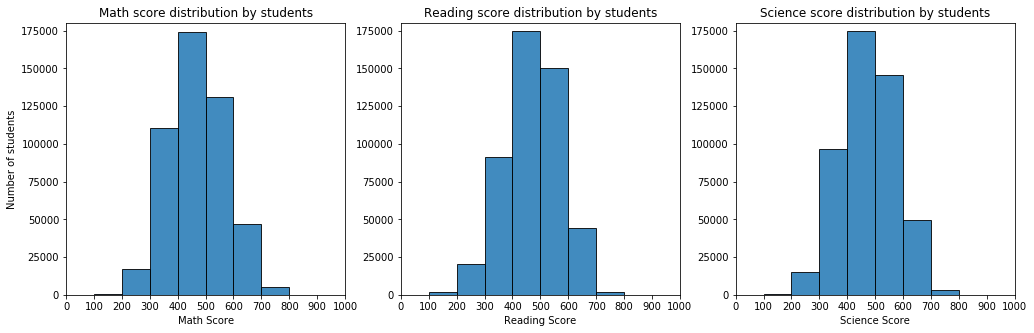

In [3]:
plt.figure(figsize = [17, 5])

bins_hist = np.arange(0, 1000 + 1, 100)

plt.subplot(1, 3, 1)
plt.hist(df_clean['math_score'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Math Score');
plt.ylabel('Number of students')
plt.title("Math score distribution by students");

plt.subplot(1, 3, 2)
plt.hist(df_clean['read_score'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Reading Score');
plt.title("Reading score distribution by students");

plt.subplot(1, 3, 3)
plt.hist(df_clean['sci_score'], bins = bins_hist, ec = 'black', alpha = 0.85);

plt.xlim(0, 1000);
plt.ylim(0, 180000 + 1);
plt.xticks(bins_hist)
plt.xlabel('Science Score');
plt.title("Science score distribution by students");

## Nations with the highest economic, social, and cultural status

When we look at the overall economic, social, and cultural status for each nation, we can see that the top countries are primarily Western countries.


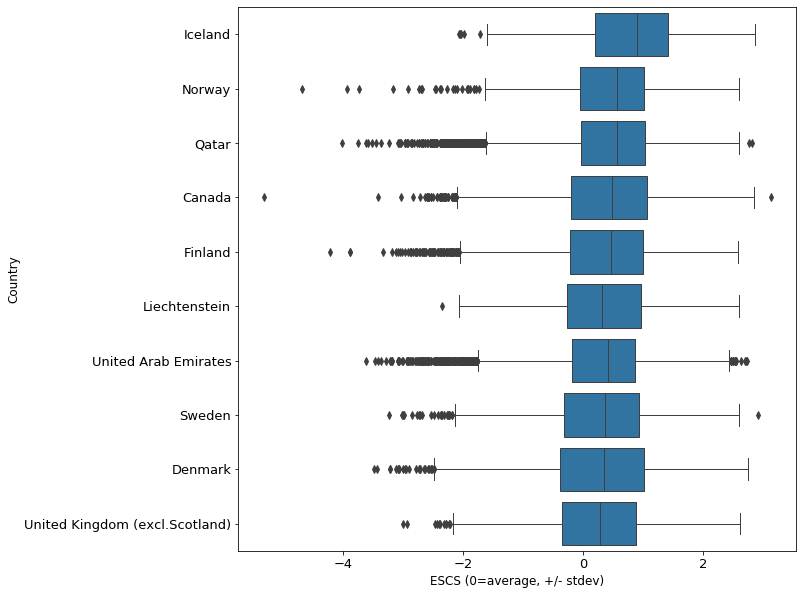

In [4]:
base_color = sns.color_palette()[0]
df_ana = df_clean.groupby('country')['ESCS'].mean().sort_values(
    ascending=False).dropna().head(10)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.boxplot(data=df_clean,
            y='country',
            x='ESCS',
            order=df_ana.index.get_level_values('country'),
            dodge=False,
            color=base_color,
            width=0.8,
            linewidth=1)
ax.set_ylabel("Country", fontsize=12)
ax.set_xlabel("ESCS (0=average, +/- stdev)", fontsize=12)
ax.tick_params(labelsize=13)
plt.show()


## Nations with the lowest economic, social, and cultural status

The bottom are third word countries with negative ESCS scores.

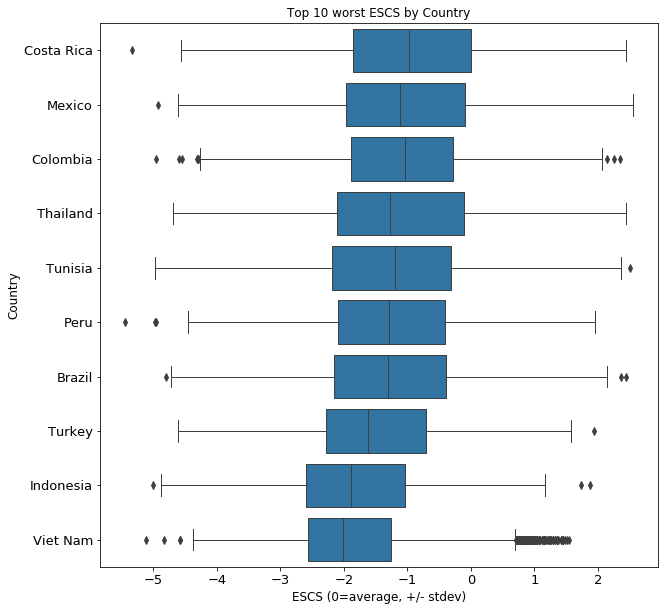

In [5]:
df_ana = df_clean.groupby('country')['ESCS'].mean().sort_values(
    ascending=False).dropna().tail(10)

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.boxplot(data=df_clean,
            y='country',
            x='ESCS',
            order=df_ana.index.get_level_values('country'),
            dodge=False,
            color=base_color,
            width=0.8,
            linewidth=1)
ax.set_ylabel("Country", fontsize=12)
ax.set_xlabel("ESCS (0=average, +/- stdev)", fontsize=12)
ax.tick_params(labelsize=13)
ax.set_title("Top 10 worst ESCS by Country")
plt.show()

## STEM Performance and Country Analysis

Asisan countries like China, Singapore are dominant in the Top 10 best countries in perfoming STEM tests (math and science), occupying 6 out of 10 places.

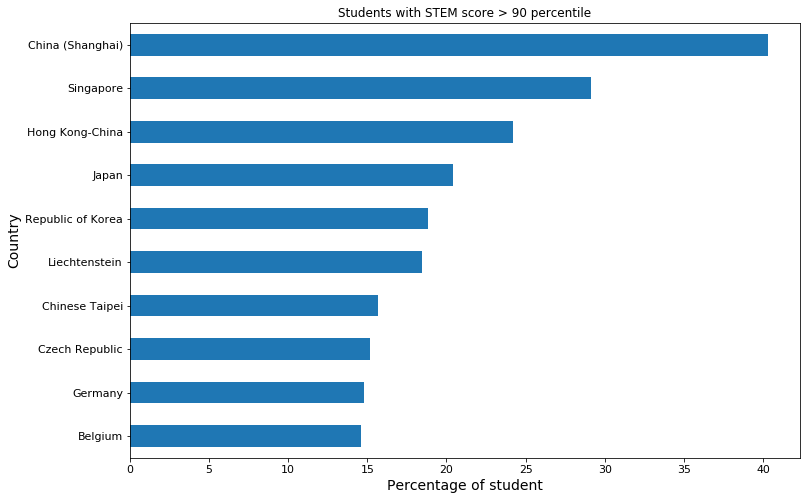

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
dt = (df_clean[(df_clean['sci_score'] > df_clean['sci_score'].quantile(0.9)) & 
               (df_clean['math_score']>df_clean['math_score'].quantile(0.9))].groupby('country')['country'].count()/
        df_clean.groupby('country')['student_id'].count()).sort_values()* 100
dt.dropna().tail(10).plot(kind="barh", fontsize=11)
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Percentage of student", fontsize=14)
ax.set_title ('Students with STEM score > 90 percentile')
plt.show()

## Overall Scores by Opportunity

We defined student to be "advantaged" if their ESCS > 1. It is considered as "disadvantaged" if their ESCS < -1. We can see that children who are advantaged perform better in overall academic literacy.

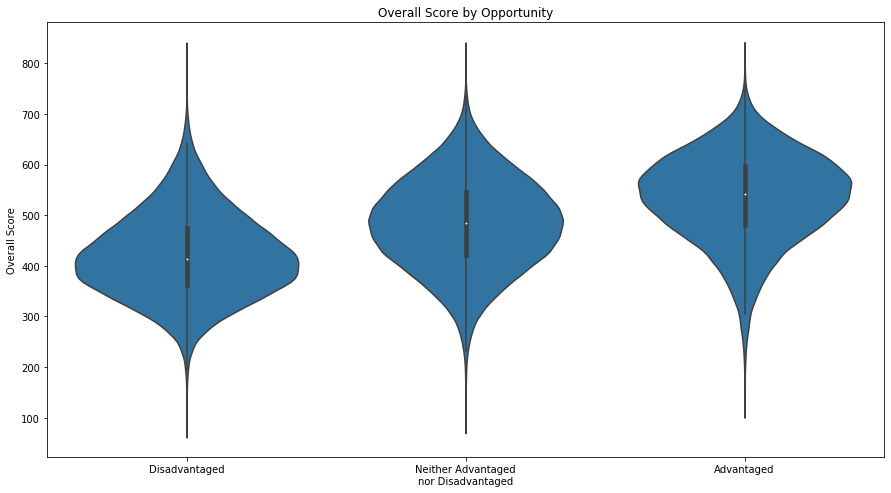

In [7]:
base_color = sns.color_palette()[0]
df_dis = pd.DataFrame(df_clean.query('ESCS <= -1'),
                   columns=['overall_score']).assign(opp='Disadvantaged')
df_nor = pd.DataFrame(df_clean.query('ESCS >= -1 and ESCS <= 1'),
                   columns=['overall_score'
                           ]).assign(opp='Neither Advantaged\nnor Disadvantaged')
df_ad = pd.DataFrame(df_clean.query('ESCS >= 1'),
                   columns=['overall_score']).assign(opp='Advantaged')

cdf = pd.concat([df_dis, df_nor, df_ad])

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
ax = sns.violinplot(x='opp', y='overall_score', data=cdf, color = base_color)
ax.set_xlabel(None)
ax.set_ylabel("Overall Score")
ax.set_title("Overall Score by Opportunity")
plt.show()

In [ ]:
!jupyter nbconvert PISA_presentation.ipynb --to slides --post serve --template output_toggle